# Noise Removal With Autoencoders.

## Import libraries

In [3]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.callbacks import TensorBoard
from keras.datasets import mnist
import numpy as np
from keras import backend as K
import matplotlib.pyplot as plt

## Dataset creation and separation

---



In [5]:
(x_train, _), (x_test, _) = mnist.load_data()

In [6]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [7]:
print('Egitim', x_train.shape)
print('Test', x_test.shape)


Egitim (60000, 28, 28, 1)
Test (10000, 28, 28, 1)


## Adding noise to data

In [8]:
noise_factor = 0.5

x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_test.shape)

x_train_noisy =  np.clip(x_train_noisy, 0. , 1.)
x_test_noisy =  np.clip(x_test_noisy, 0. , 1.)

## Visualizing noisy data

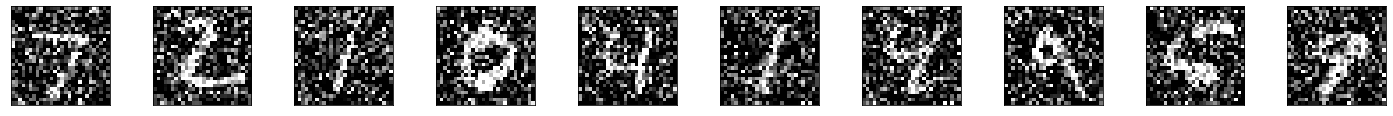

Noisy Original Images


In [11]:
%matplotlib inline 

n = 10

plt.figure(figsize = (25, 4))

for i in range(n):
  ax= plt.subplot(2 , n, i+1)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False) # does not print x and y axis values ​​when called false. The image is seen as a picture.Not like graphics
  ax.get_yaxis().set_visible(False)

plt.show()
print('Noisy Original Images')

![](https://miro.medium.com/max/605/1*stpRRU3tUaOtTjRqh24v0w.png)

## ENCODE Model (encoder part)

In [12]:
input_img = Input(shape = (28, 28 ,1))

x = Conv2D(32, (3,3), activation = 'relu', padding = 'same', )(input_img) 

x =  MaxPooling2D((2,2), padding = 'same')(x) 

x = Conv2D(32, (3,3), activation = 'relu', padding = 'same', )(x) 

encoded = MaxPooling2D((2,2), padding = 'same')(x)

# (7, 7, 32) this result is obtained

## DECODE Model (decoder part)

In [13]:
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same' ) (encoded)

x  = UpSampling2D((2,2))(x) # performs the enlargement operation. Creates an effect between pixels. Instead, "deconvolution" can also be applied.

x = Conv2D(32, (3,3), activation = 'relu', padding = 'same') (x)

x  = UpSampling2D((2,2), )(x)

decoded = Conv2D(1, (3,3), activation = 'sigmoid', padding = 'same')(x)


## Compiling and training the model

In [15]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [20]:
autoencoder.fit(x_train_noisy, x_train,
                epochs = 50, # better results can be obtained if we choose 100.
                batch_size = 128,
                shuffle = True,
                validation_data = (x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

decoded_imgs = autoencoder.predict(x_test) 

Epoch 1/50
469/469 [==============================] - 4s 8ms/step - loss: 0.2365 - val_loss: 0.2316
Epoch 2/50
469/469 [==============================] - 3s 7ms/step - loss: 0.2282 - val_loss: 0.2246
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.2224 - val_loss: 0.2195
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.2179 - val_loss: 0.2154
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.2141 - val_loss: 0.2118
Epoch 6/50
469/469 [==============================] - 4s 9ms/step - loss: 0.2108 - val_loss: 0.2086
Epoch 7/50
469/469 [==============================] - 3s 7ms/step - loss: 0.2077 - val_loss: 0.2056
Epoch 8/50
469/469 [==============================] - 3s 7ms/step - loss: 0.2048 - val_loss: 0.2027
Epoch 9/50
469/469 [==============================] - 4s 8ms/step - loss: 0.2020 - val_loss: 0.1999
Epoch 10/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1992 - val_loss: 0.1971

## Visualization of Results

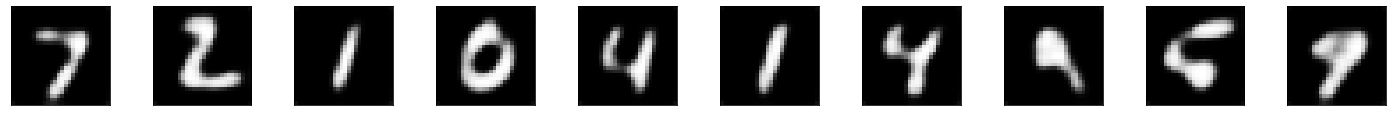

DENOISED - Noise suppressed image


In [21]:
%matplotlib inline 

n = 10

plt.figure(figsize = (25, 4))

for i in range(n):
  ax= plt.subplot(2 , n, i+1)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False)

plt.show()
print('DENOISED - Noise suppressed image')